# Task 1: Web Scraping and Text Analysis of Customer Review Data

## Scraping data from Skytrax

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import re

In [3]:
url = "https://www.airlinequality.com/airline-reviews/british-airways"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Referer': 'https://www.airlinequality.com/'
}

# Scraping all html element data from the site url
def get_data(url):
    req = Request(url, headers=headers)
    html = urlopen(req)
    soup = BeautifulSoup(html, 'html.parser')
    return soup

In [4]:
# Collecting review data on current page and extracting the url for the next proceeding page
def get_next_page(soup, review_lst = []):
    
    reviews = soup.find_all('article', {'itemprop': 'review'})
    
    for review in reviews:
        
        date_posted = author = review.find(
            'h3', {
                'class': 'text_sub_header'
            }).find('time')['datetime']
        
        rating_div = review.find(
            'div', {
                'class': 'rating-10'
            })
        
        overall_rating = rating_div.find(
            'span', {
                'itemprop': 'ratingValue'
            }).get_text() if len(rating_div) > 1 else None
        
        author = review.find(
            'h3', {
                'class': 'text_sub_header'
            }).find(
            'span', {
                'itemprop': 'author'
            }).find('span', {
                'itemprop': 'name'
            }).get_text()
        
        country_str = re.split(r'[()]', review.find(
            'h3', {
                'class': 'text_sub_header'
            }).get_text())
        
        country = country_str[1] if len(country_str) > 1 else None
        
        header = re.sub('"', '', review.find(
            'h2', {
                'class': 'text_header'
            }).get_text())
        
        review_text = review.find(
            'div', {
                'itemprop': 'reviewBody'
            }).get_text()
        
        is_verified = 1 if review_text.startswith('✅ Trip Verified') else 0
        
        review_stats = review.find(
            'div', {
                'class': 'review-stats'
            }).find('table').find_all('tr')
        
        extracted_stats = []
        
        for stat in review_stats:
            stat_data = stat.find_all('td')
            extracted_stats.append([stat_data[0], stat_data[1]])
            
        aircraft = traveller_type = route = seat_type = aircraft = date_flown = seat_comfort_rating = staff_service_rating = food_bev_rating = entertainment_rating = ground_service_rating = wifi_rating = value_for_money_rating = is_recommended = None

        for stat in extracted_stats:

            if stat[0].get_text() == 'Aircraft':
                aircraft = stat[1].get_text()

            elif stat[0].get_text() == 'Type Of Traveller':
                traveller_type = stat[1].get_text()

            elif stat[0].get_text() == 'Seat Type':
                seat_type = stat[1].get_text()

            elif stat[0].get_text() == 'Route':
                route = stat[1].get_text()

            elif stat[0].get_text() == 'Date Flown':
                date_flown = stat[1].get_text()

            elif stat[0].get_text() == 'Seat Comfort':
                seat_comfort_rating = len(stat[1].find_all('span', {'class': 'star fill'}))

            elif stat[0].get_text() == 'Cabin Staff Service':
                staff_service_rating = len(stat[1].find_all('span', {'class': 'star fill'}))

            elif stat[0].get_text() == 'Food & Beverages':
                food_bev_rating = len(stat[1].find_all('span', {'class': 'star fill'}))

            elif stat[0].get_text() == 'Inflight Entertainment':
                entertainment_rating = len(stat[1].find_all('span', {'class': 'star fill'}))

            elif stat[0].get_text() == 'Ground Service':
                ground_service_rating = len(stat[1].find_all('span', {'class': 'star fill'}))

            elif stat[0].get_text() == 'Wifi & Connectivity':
                wifi_rating = len(stat[1].find_all('span', {'class': 'star fill'}))

            elif stat[0].get_text() == 'Value For Money':
                value_for_money_rating = len(stat[1].find_all('span', {'class': 'star fill'}))

            elif stat[0].get_text() == 'Recommended':
                is_recommended = 1 if stat[1].get_text() == 'yes' else 0

        review_data = [
            date_posted,
            author,
            country,
            overall_rating,
            header,
            review_text,
            aircraft,
            traveller_type,
            seat_type,
            route,
            date_flown,
            seat_comfort_rating, 
            staff_service_rating,
            food_bev_rating,
            entertainment_rating, 
            ground_service_rating,
            wifi_rating,
            value_for_money_rating,
            is_recommended,
            is_verified
        ]

        review_lst.append(review_data)
    
    page = soup.find('article', {'class': 'comp_reviews-pagination'}).find('ul')
    
    try:
        if not (page.find('li') == page.find_all('li')[-1]):
            next_pape_url = 'https://www.airlinequality.com/' + str(page.find_all('li')[-1].find('a')['href'])
            return next_pape_url, review_lst
    except:
        return None, review_lst

In [5]:
data_headings = [
    'date_posted',
    'author',
    'country',
    'overall_rating',
    'header',
    'review_text',
    'aircraft',
    'traveller_type',
    'seat_type',
    'route',
    'date_flown',
    'seat_comfort_rating',
    'staff_service_rating',
    'food_beverage_rating',
    'entertainment_rating',
    'ground_service_rating',
    'wifi_rating',
    'value_for_money_rating',
    'is_recommended',
    'is_verified'
]

review_data = None

while True:
    soup = get_data(url)
    url, review_list = get_next_page(soup)
    if url == None:
        review_data = pd.DataFrame(review_list, columns=data_headings)
        break

In [6]:
review_data.head()

,date_posted,author,country,overall_rating,header,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort_rating,staff_service_rating,food_beverage_rating,entertainment_rating,ground_service_rating,wifi_rating,value_for_money_rating,is_recommended,is_verified
0,2023-12-18,C Lowe,United Kingdom,6,“Does BA pay experts to design these breakfasts”,Not Verified | All 4 of our flights were fine ...,A320/Boeing 777,Couple Leisure,Business Class,Belfast City to Atlanta via London Heathrow,November 2023,4.0,5.0,1.0,3.0,5.0,NaN,5,1,0
1,2023-12-17,Greg Zarelli,United States,4,business class seats were abysmal,cNot Verified | I had hoped this would be a g...,Boeing 787-8,Business,Business Class,London to Portland,December 2023,3.0,3.0,4.0,3.0,3.0,NaN,2,0,0
2,2023-12-15,D Kears,United Kingdom,1,Worst service/airline ever,✅ Trip Verified | I was going to fly to Frank...,None,Solo Leisure,Economy Class,London to Frankfurt,June 2023,1.0,NaN,NaN,NaN,1.0,NaN,1,0,1
3,2023-12-14,B Jackson,United Kingdom,8,“Much better experience this time around”,✅ Trip Verified | Much better experience this ...,A350,Solo Leisure,Business Class,Cape Town to London Heathrow,December 2023,5.0,4.0,5.0,5.0,5.0,1.0,4,1,1
4,2023-12-12,H Miller,United Kingdom,3,“our compensation rights,✅ Trip Verified | Once again a terrible busine...,None,Couple Leisure,Business Class,Miami to Manchester via Heathrow,December 2023,1.0,3.0,2.0,3.0,1.0,1.0,2,0,1


## Data Pre-processing

#### Handle Missing Values

In [7]:
review_data.isnull().sum()

date_posted                  0
author                       0
country                      2
overall_rating               5
header                       0
review_text                  0
aircraft                  1785
traveller_type             771
seat_type                    2
route                      775
date_flown                 778
seat_comfort_rating        116
staff_service_rating       128
food_beverage_rating       388
entertainment_rating      1145
ground_service_rating      846
wifi_rating               3100
value_for_money_rating       0
is_recommended               0
is_verified                  0
dtype: int64

#### Dropping Columns

Dropping columns with a high number of missing values, such as 'wifi_rating' if it's missing in a significant portion of the data.

In [8]:
review_data = review_data.drop(columns=['wifi_rating'])
review_data = review_data.drop(columns=['entertainment_rating'])
review_data = review_data.drop(columns=['food_beverage_rating'])
review_data = review_data.drop(columns=['ground_service_rating'])

#### Imputing Data Values

Impute missing values in numerical columns such as "ratings" with median value of it's observations.

In [9]:
review_data['overall_rating'].fillna(review_data['overall_rating'].median(), inplace=True)
review_data['seat_comfort_rating'].fillna(review_data['seat_comfort_rating'].median(), inplace=True)
review_data['staff_service_rating'].fillna(review_data['staff_service_rating'].median(), inplace=True)

#### Converting Data Types

In [10]:
review_data.dtypes

date_posted                object
author                     object
country                    object
overall_rating             object
header                     object
review_text                object
aircraft                   object
traveller_type             object
seat_type                  object
route                      object
date_flown                 object
seat_comfort_rating       float64
staff_service_rating      float64
value_for_money_rating      int64
is_recommended              int64
is_verified                 int64
dtype: object

In [11]:
review_data['overall_rating'] = pd.to_numeric(review_data['overall_rating'], errors='coerce')
review_data['date_flown'] = pd.to_datetime(review_data['date_flown'], errors='coerce')
review_data['value_for_money_rating'] = review_data['value_for_money_rating'].astype(float)
review_data['is_recommended'] = review_data['is_recommended'].astype(bool)
review_data['is_verified'] = review_data['is_verified'].astype(bool)

#### Text Cleaning

#### Normalizing Review Text

The review text is normalized by removing stopwords, punctuation, and lemmatizing words to their base forms.

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dahaliahowell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dahaliahowell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
review_data['review_text'] = review_data['review_text'].str.replace('✅ Trip Verified', '')
review_data['review_text'] = review_data['review_text'].str.replace('Not Verified', '')

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def text_clean(review):
    stop_free = ' '.join([i for i in review.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [14]:
review_data['review_text'] = review_data['review_text'].apply(text_clean)

In [15]:
review_data.head()

,date_posted,author,country,overall_rating,header,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort_rating,staff_service_rating,value_for_money_rating,is_recommended,is_verified
0,2023-12-18,C Lowe,United Kingdom,6.0,“Does BA pay experts to design these breakfasts”,4 flight fine term comfort punctuality service...,A320/Boeing 777,Couple Leisure,Business Class,Belfast City to Atlanta via London Heathrow,2023-11-01,4.0,5.0,5.0,True,False
1,2023-12-17,Greg Zarelli,United States,4.0,business class seats were abysmal,c hoped would good review unfortunately won’t ...,Boeing 787-8,Business,Business Class,London to Portland,2023-12-01,3.0,3.0,2.0,False,False
2,2023-12-15,D Kears,United Kingdom,1.0,Worst service/airline ever,going fly frankfurt glasgow london flight lond...,None,Solo Leisure,Economy Class,London to Frankfurt,2023-06-01,1.0,3.0,1.0,False,True
3,2023-12-14,B Jackson,United Kingdom,8.0,“Much better experience this time around”,much better experience time around flew cpt lh...,A350,Solo Leisure,Business Class,Cape Town to London Heathrow,2023-12-01,5.0,4.0,4.0,True,True
4,2023-12-12,H Miller,United Kingdom,3.0,“our compensation rights,terrible business class experience ba flight d...,None,Couple Leisure,Business Class,Miami to Manchester via Heathrow,2023-12-01,1.0,3.0,2.0,False,True


#### Verifying Data Integrity

In [16]:
print(review_data['traveller_type'].unique())
print(review_data['seat_type'].unique())

['Couple Leisure' 'Business' 'Solo Leisure' 'Family Leisure' None]
['Business Class' 'Economy Class' 'First Class' 'Premium Economy' None]


## Analysis of Data

### Wordcloud Analysis

To verify whether the preprocessing, we’ll make a word cloud to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track.

In [17]:
from wordcloud import WordCloud

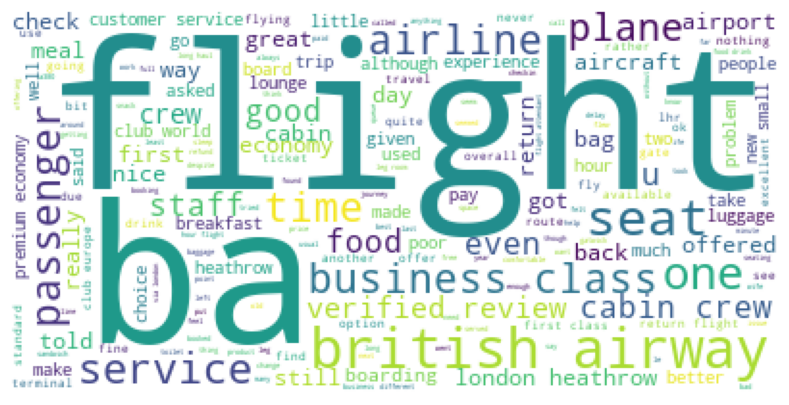

In [18]:
review_words = ' '.join(review_data['review_text'])

wordcloud = WordCloud(background_color="white").generate(review_words)

plt.figure(figsize = (15, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The term `verified text` appears to be a prevalant term in the reviews. It is likely not user generated, which would make it irrelevant to the analysis; hence let's remove it.

In [19]:
review_data['review_text'] = review_data['review_text'].str.replace('verified review', '')

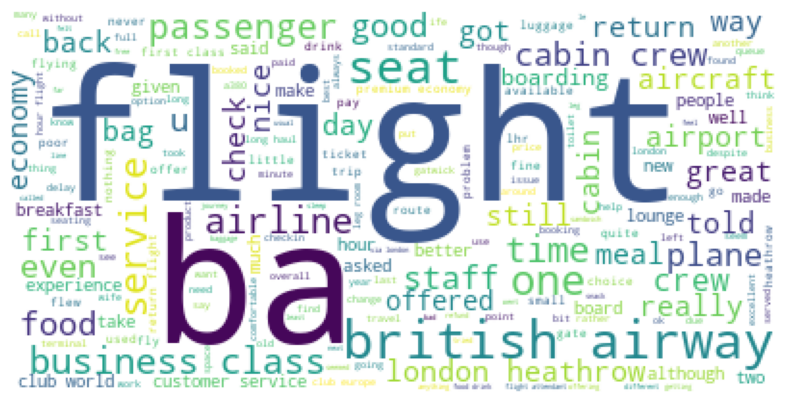

In [20]:
review_words = ' '.join(review_data['review_text'])
wordcloud = WordCloud(background_color="white").generate(review_words)

review_data['review_text'] = review_data['review_text'].str.replace('verified review', '')
plt.figure(figsize = (15, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Topic Modeling of Reviews

In [21]:
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim
from pprint import pprint

In [22]:
review_data_docs = review_data.review_text.values.tolist()
review_docs = [doc.split() for doc in review_data_docs]

In [23]:
id2word = corpora.Dictionary(review_docs)
texts = review_docs
corpus = [id2word.doc2bow(text) for text in texts]

In [24]:
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print keywords in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"flight" + 0.017*"ba" + 0.011*"seat" + 0.011*"service" + 0.009*"time" '
  '+ 0.008*"cabin" + 0.008*"airway" + 0.008*"good" + 0.007*"crew" + '
  '0.007*"british"'),
 (1,
  '0.030*"flight" + 0.013*"ba" + 0.009*"hour" + 0.008*"seat" + 0.008*"service" '
  '+ 0.007*"time" + 0.007*"crew" + 0.007*"food" + 0.006*"first" + '
  '0.006*"airline"'),
 (2,
  '0.025*"flight" + 0.019*"ba" + 0.015*"seat" + 0.010*"service" + '
  '0.009*"british" + 0.009*"airway" + 0.008*"food" + 0.007*"good" + '
  '0.006*"class" + 0.006*"london"'),
 (3,
  '0.021*"flight" + 0.012*"seat" + 0.010*"service" + 0.010*"good" + '
  '0.008*"food" + 0.007*"ba" + 0.007*"cabin" + 0.006*"london" + 0.006*"back" + '
  '0.006*"heathrow"'),
 (4,
  '0.022*"seat" + 0.019*"flight" + 0.014*"ba" + 0.009*"class" + '
  '0.009*"business" + 0.008*"london" + 0.008*"crew" + 0.008*"service" + '
  '0.007*"economy" + 0.007*"hour"'),
 (5,
  '0.019*"flight" + 0.012*"ba" + 0.010*"service" + 0.009*"seat" + 0.008*"food" '
  '+ 0.008*"class" 

To ease interpretation, let's visualize the topic model.

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/Users/dahaliahowell/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/dahaliahowell/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.000142  0.003118       1        1  21.335212
4     -0.001198 -0.014319       2        1  20.866390
0     -0.013460 -0.004321       3        1  15.490654
5     -0.009498  0.015094       4        1   7.994378
9      0.026006 -0.020553       5        1   7.956739
1      0.017508 -0.010126       6        1   7.036226
7      0.000289  0.029142       7        1   6.121842
8     -0.016013 -0.023459       8        1   5.899317
3     -0.026732  0.007791       9        1   4.599220
6      0.023240  0.017633      10        1   2.700021, topic_info=         Term         Freq        Total Category  logprob  loglift
21     flight  7565.000000  7565.000000  Default  30.0000  30.0000
127      seat  4448.000000  4448.000000  Default  29.0000  29.0000
357      time  2309.000000  2309.000000  Default  28.0000  28.0000
43    service  2832.000000  2832.000000  Default  27.0000  27.0000
5          ba  4703.000000  4703.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
169      food    35.914574  2268.610426  Topic10  -5.4916  -0.5339
107       new    24.791502   874.976126  Topic10  -5.8622   0.0482
346     staff    28.931581  1498.918786  Topic10  -5.7078  -0.3357
113       one    28.644443  1594.457733  Topic10  -5.7178  -0.4074
1071  economy    24.420475  1382.438864  Topic10  -5.8773  -0.4243

[821 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
13953      2  0.620996        0027
14513      9  0.417223         004
7160       4  0.587810        0103
14135      6  0.563783         01d
14136      6  0.563725         01f
...      ...       ...         ...
7357       2  0.649587         £56
14546      3  0.515361         £72
1943       1  0.506154    “because
5791       5  0.516558  “evoucher”
14020      2  0.622094         €60

[1960 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 6, 10, 2, 8, 9, 4, 7])

Based on the provided output from the topic modeling, the most prevalent topics seem to be seat and airline, time and crew and flight experience. 

### Sentiment Analysis

In [26]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.5:
        sentiment = 1 
    elif scores['compound'] > -0.5:
        sentiment = -1
    else:
        sentiment = 0

    return sentiment

review_data['sentiment'] = review_data['review_text'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dahaliahowell/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
review_positive = review_data[review_data['sentiment'] == 1]
len(review_positive)

2106

In [28]:
review_negative = review_data[review_data['sentiment'] == -1]
len(review_negative)

737

In [29]:
review_neutral = review_data[review_data['sentiment'] == 0]
len(review_neutral)

874

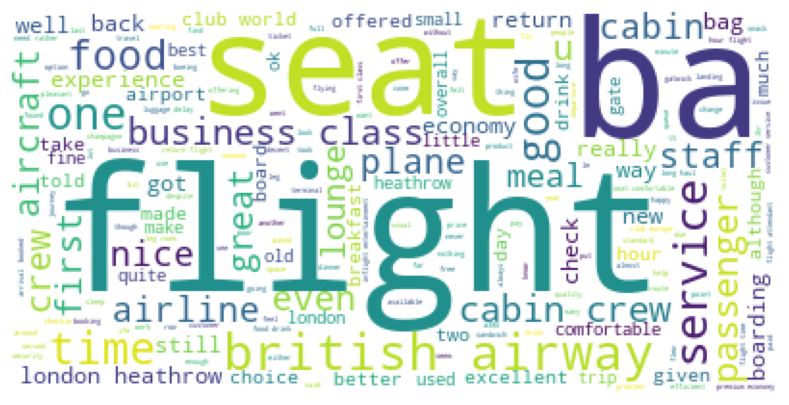

In [30]:
total_pos_reviews = ' '.join(review_positive['review_text'])
wordcloud = WordCloud(background_color="white").generate(total_pos_reviews)

plt.figure(figsize = (15, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

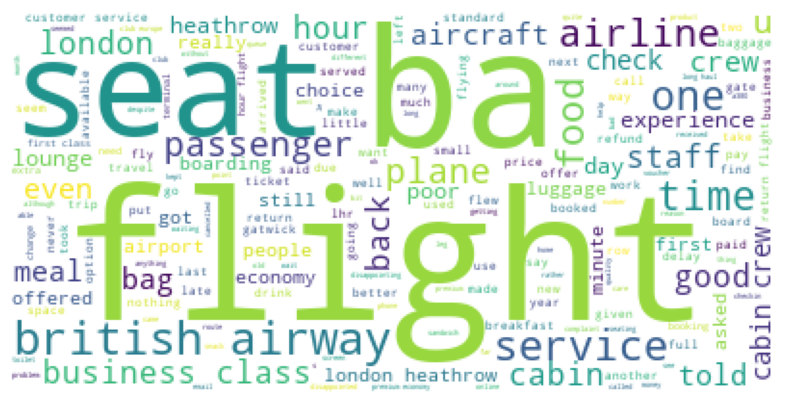

In [31]:
total_neg_reviews = ' '.join(review_negative['review_text'])
wordcloud = WordCloud(background_color="white").generate(total_neg_reviews)

plt.figure(figsize = (15, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Based on the word cloud analyses of positive and negative sentiments, it's clear that there are many overlapping words and terms.This is likely a result of the subjectivity of sentiment analysis, where the same word may be interpreted differently based on its context within a sentence. Also, there are some words that seem very neutral, lacking a strong sentiment on their own. This could contribute to them appearing in both positive and negative reviews without significantly affecting the overall sentiment.